In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

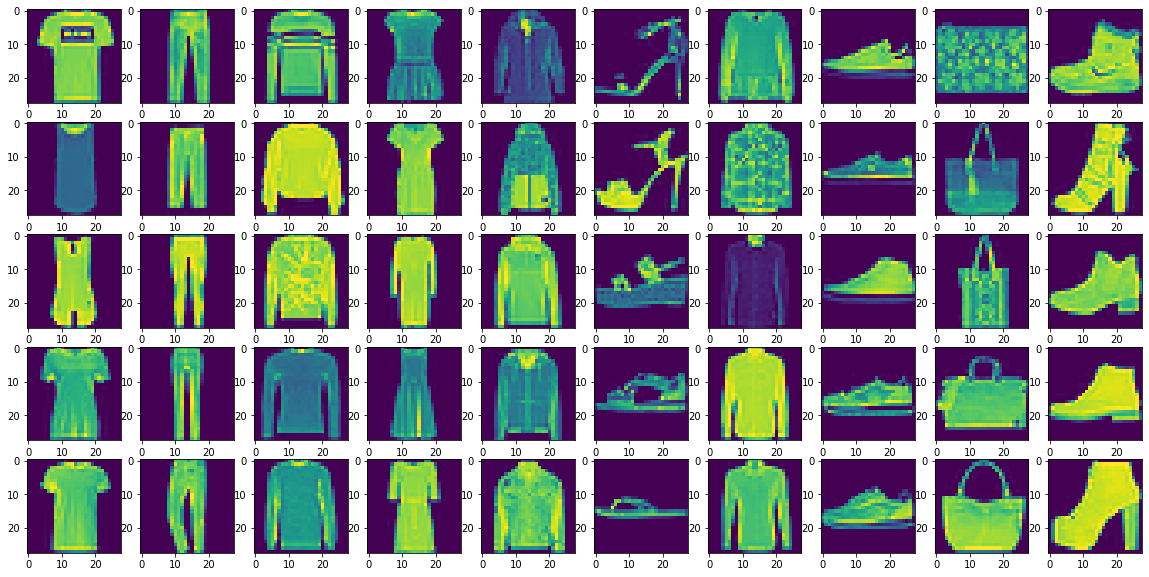

In [0]:
def give_images_from_class(k, how_many):
  return x_train[y_train==k][:how_many]

f, axarr = plt.subplots(5,10, figsize=(20,10))
for i in range(10):
  for j in range(5):
    axarr[j,i].imshow(give_images_from_class(i, 5)[j])

In [0]:
from collections import Counter
Counter(y_test.tolist())

Counter({0: 1000,
         1: 1000,
         2: 1000,
         3: 1000,
         4: 1000,
         5: 1000,
         6: 1000,
         7: 1000,
         8: 1000,
         9: 1000})

In [0]:
boots = x_train[y_train==9]

In [0]:
pixels = dict(Counter(boots.flatten().tolist()))

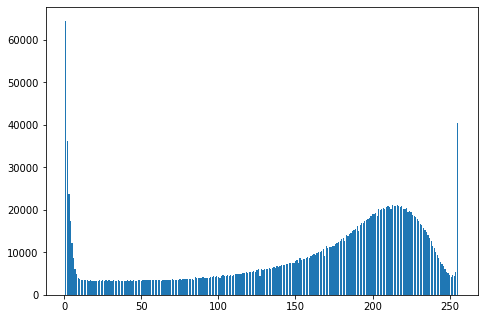

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(list(pixels.keys())[1:],list(pixels.values())[1:])
plt.show()

In [0]:
pixels[4]

17362

In [0]:
pixels[1]/(np.array(list(pixels.values())[1:]).sum())

0.028313666920851428

In [0]:
def compute_correlation(k):
  label_1_vs_all = 1 * (y_train==k)
  data = x_train
  result = np.zeros((28,28))
  for i in range(28):
    for j in range(28):
      result[i,j] = np.corrcoef(data[:,i,j], label_1_vs_all)[0,1]
  return result

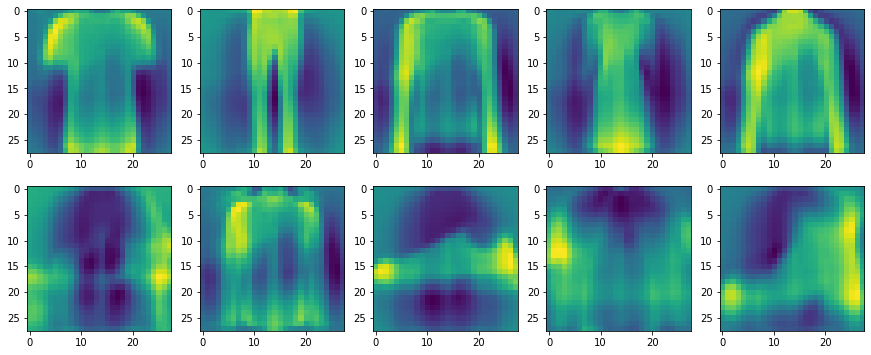

In [0]:
f, axarr = plt.subplots(2,5, figsize=(15,6))
for i in range(2):
  for j in range(5):
    axarr[i,j].imshow(compute_correlation(5*i+j))


In [0]:

from scipy.stats import wasserstein_distance
wasserstein_distance(data[y_train==9][:,0,0], data[y_train==9][:,0,0])

0.0

In [0]:
def compute_wasserstein_distance(imgs1, imgs2, labels):
  results = {}
  for k in range(10):
    imgs1_label_k = imgs1[labels==k]
    imgs2_label_k = imgs2[labels==k]
    result = np.zeros((28,28))
    for i in range(28):
      for j in range(28):
        result[i,j] = wasserstein_distance(imgs1_label_k[:,i,j],imgs2_label_k[:,i,j])
    results[k] = result
    print(k)
  return results

In [0]:
results_90 = compute_wasserstein_distance(x_train, np.rot90(x_train,1,(1,2)), y_train)
results_180 = compute_wasserstein_distance(x_train, np.rot90(x_train,2,(1,2)), y_train)
results_270 = compute_wasserstein_distance(x_train, np.rot90(x_train,3,(1,2)), y_train)

0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9


In [0]:
for i in range(10):
    print(i)
    print("    " + str(results_90[i].mean()))
    print("    " + str(results_180[i].mean()))
    print("    " + str(results_270[i].mean()))

0
    65.49566879251701
    24.726990646258503
    65.49566879251701
1
    74.49140603741496
    21.01161522108844
    74.49140603741496
2
    43.58861777210884
    25.964589710884354
    43.58861777210884
3
    72.90716454081632
    12.426691326530614
    72.90716454081632
4
    48.5423125
    26.024945578231296
    48.542312499999994
5
    35.089914965986395
    30.574969812925172
    35.089914965986395
6
    42.70894430272109
    14.472461734693878
    42.70894430272109
7
    48.646486819727905
    34.752378401360545
    48.64648681972788
8
    36.96452338435375
    51.823571003401355
    36.96452338435375
9
    72.0086568877551
    80.68538647959183
    72.0086568877551


In [0]:
results_180[0].mean()

24.726990646258503

In [0]:
results_270[0].mean()

65.49566879251701

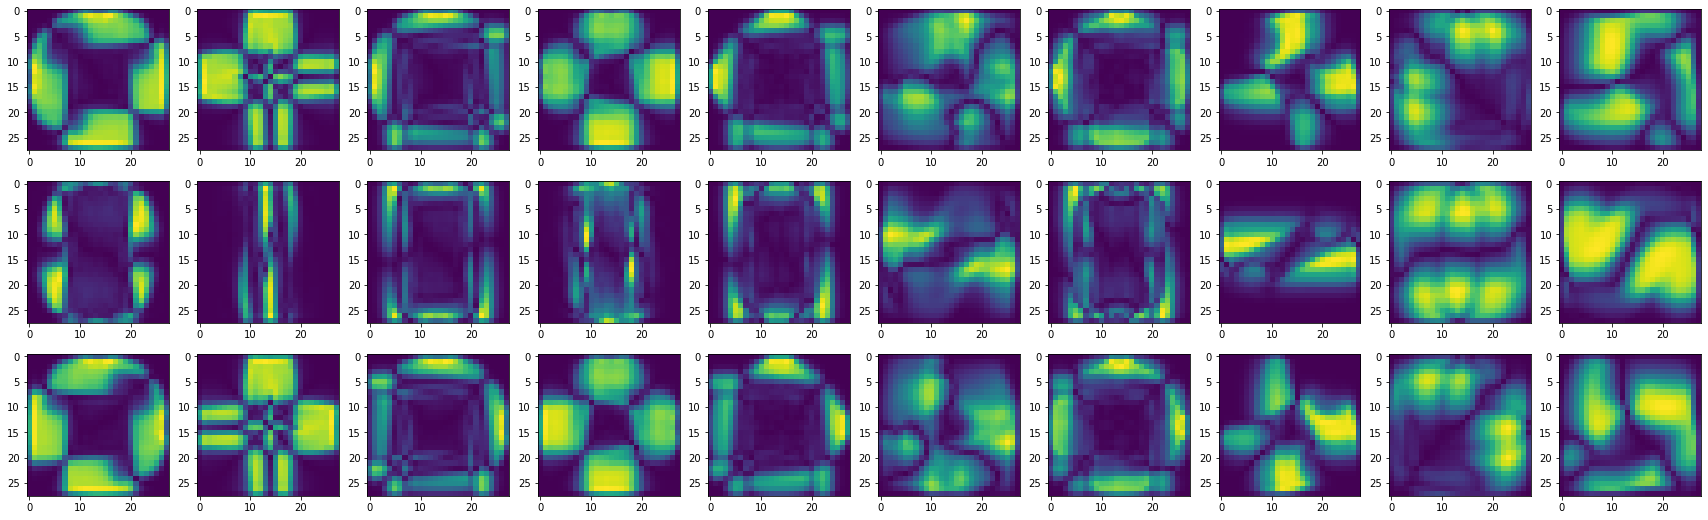

In [0]:
fig, axarr = plt.subplots(3,10,figsize=(30,9))
results = {0:results_90, 1: results_180, 2:results_270}
for i in range(3):
  for j in range(10):
    axarr[i,j].imshow(results[i][j])
#.tight_layout()